# SSIM

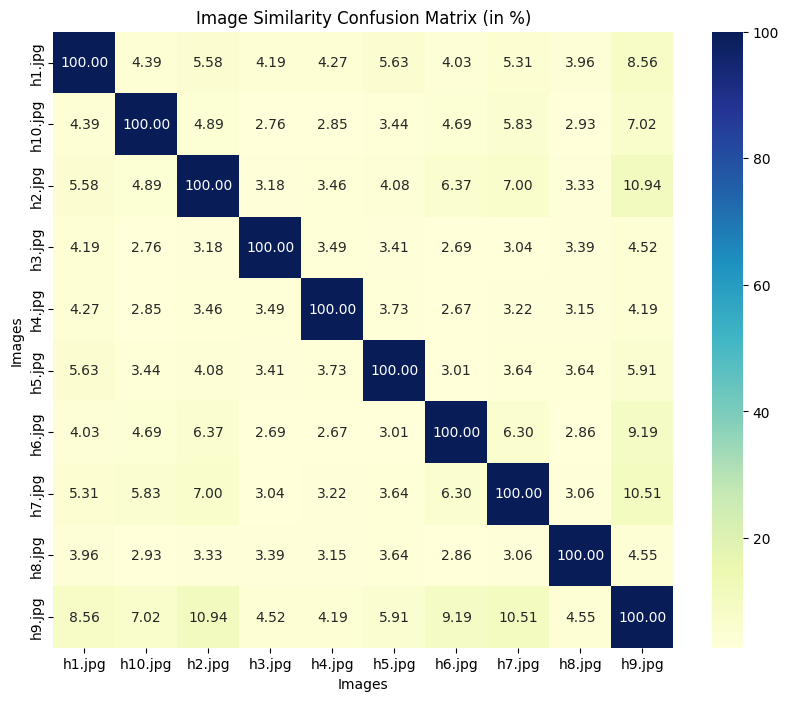

In [5]:
# Import necessary libraries
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load images
def load_images(image_folder):
    images = []
    image_names = []
    for filename in os.listdir(image_folder):
        if filename.endswith(".jpg"):
            image_path = os.path.join(image_folder, filename)
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append(img)
                image_names.append(filename)
    return images, image_names

# Function to calculate SSIM between two images
def calculate_ssim(image1, image2):
    score, _ = ssim(image1, image2, full=True)
    return score

# Function to create the confusion matrix based on SSIM
def create_confusion_matrix(images, image_names):
    n = len(images)
    similarity_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(i, n):
            similarity_score = calculate_ssim(images[i], images[j])
            similarity_matrix[i, j] = similarity_score * 100  # Convert to percentage
            similarity_matrix[j, i] = similarity_score * 100  # Convert to percentage
    
    return similarity_matrix

# Load images from the folder 'H'
image_folder = 'H'  # The folder containing the images
images, image_names = load_images(image_folder)

# Create the confusion matrix based on SSIM similarity
similarity_matrix = create_confusion_matrix(images, image_names)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, cmap="YlGnBu", xticklabels=image_names, yticklabels=image_names, fmt=".2f")
plt.title('Image Similarity Confusion Matrix (in %)')
plt.xlabel('Images')
plt.ylabel('Images')
plt.show()


# Pixel Values

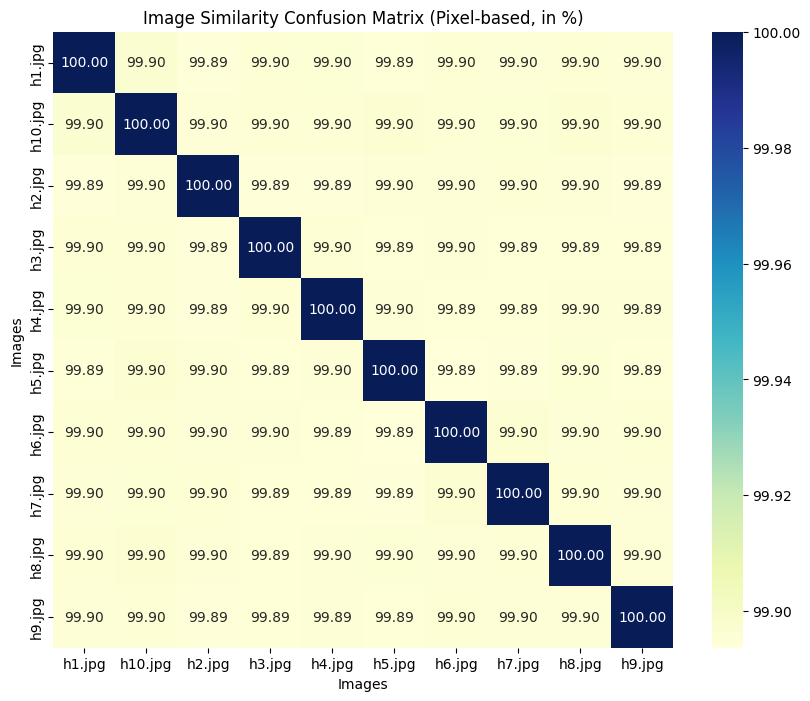

In [6]:
# Import necessary libraries
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load images
def load_images(image_folder):
    images = []
    image_names = []
    for filename in os.listdir(image_folder):
        if filename.endswith(".jpg"):
            image_path = os.path.join(image_folder, filename)
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append(img)
                image_names.append(filename)
    return images, image_names

# Function to calculate MSE between two images
def calculate_mse(image1, image2):
    return np.sum((image1 - image2) ** 2) / float(image1.shape[0] * image1.shape[1])

# Function to create the confusion matrix based on MSE similarity
def create_confusion_matrix(images, image_names):
    n = len(images)
    similarity_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(i, n):
            mse_value = calculate_mse(images[i], images[j])
            # Convert MSE to a similarity percentage (lower MSE means more similar)
            similarity_score = max(0, 100 - (mse_value / 1000))  # Scaling factor can be adjusted
            similarity_matrix[i, j] = similarity_score
            similarity_matrix[j, i] = similarity_score
    
    return similarity_matrix

# Load images from the folder 'H'
image_folder = 'H'  # The folder containing the images
images, image_names = load_images(image_folder)

# Create the confusion matrix based on pixel similarity (MSE)
similarity_matrix = create_confusion_matrix(images, image_names)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, cmap="YlGnBu", xticklabels=image_names, yticklabels=image_names, fmt=".2f")
plt.title('Image Similarity Confusion Matrix (Pixel-based, in %)')
plt.xlabel('Images')
plt.ylabel('Images')
plt.show()


# SSIM based matching

In [22]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import os

# Function to load images from a folder
def load_images(image_folder):
    images = []
    image_names = []
    for filename in os.listdir(image_folder):
        if filename.endswith(".jpg"):
            image_path = os.path.join(image_folder, filename)
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append(img)
                image_names.append(filename)  # Image names are used as labels
    return images, image_names

# Function to calculate SSIM between two images
def calculate_ssim(image1, image2):
    score, _ = ssim(image1, image2, full=True)
    return score

# Function to identify the most similar image from the database
def identify_image(new_image, database_images, image_names, threshold=0.85):
    max_ssim = -1
    best_match = None
    for i, db_image in enumerate(database_images):
        ssim_value = calculate_ssim(new_image, db_image)
        print(f"SSIM between new image and {image_names[i]}: {ssim_value:.4f}")
        
        # If SSIM is higher than the threshold, update the best match
        if ssim_value > max_ssim and ssim_value >= threshold:
            max_ssim = ssim_value
            best_match = image_names[i]
    
    return best_match, max_ssim

# Load database images
image_folder = 'H'  # Folder containing known images
database_images, image_names = load_images(image_folder)

# Load the new image you want to identify
new_image_path = 'H\\h3.jpg'  # Replace with the path to the new image
new_image = cv2.imread(new_image_path, cv2.IMREAD_GRAYSCALE)

# Identify the most similar image from the database
best_match, similarity_score = identify_image(new_image, database_images, image_names)

if best_match:
    print(f"The most similar image is '{best_match}' with SSIM score of {similarity_score:.4f}")
else:
    print("No match found above the threshold!")


SSIM between new image and h1.jpg: 0.0419
SSIM between new image and h10.jpg: 0.0276
SSIM between new image and h11.jpg: 0.0357
SSIM between new image and h12.jpg: 0.0329
SSIM between new image and h13.jpg: 0.0356
SSIM between new image and h14.jpg: 0.0445
SSIM between new image and h15.jpg: 0.0551
SSIM between new image and h16.jpg: 0.0559
SSIM between new image and h17.jpg: 0.0430
SSIM between new image and h18.jpg: 0.0455
SSIM between new image and h19.jpg: 0.0454
SSIM between new image and h2.jpg: 0.0318
SSIM between new image and h20.jpg: 0.0407
SSIM between new image and h21.jpg: 0.0433
SSIM between new image and h22.jpg: 0.0406
SSIM between new image and h23.jpg: 0.0411
SSIM between new image and h24.jpg: 0.0376
SSIM between new image and h25.jpg: 0.0450
SSIM between new image and h3.jpg: 1.0000
SSIM between new image and h4.jpg: 0.0349
SSIM between new image and h5.jpg: 0.0341
SSIM between new image and h6.jpg: 0.0269
SSIM between new image and h7.jpg: 0.0304
SSIM between new i

# SSIM matching using Snippet


In [1]:
# Cell 1: Importing libraries
import cv2
import numpy as np
import os
from skimage.metrics import structural_similarity as ssim
from PIL import Image
import faiss
import matplotlib.pyplot as plt  # Add this for heatmap visualization


In [ ]:
'''def resize_image_if_needed(path, target_size=(1024, 1024)):
    # Load image
    img = cv2.imread(path)
    
    # Check if the image size is not equal to target size
    if img.shape[:2] != target_size:
        # Resize the image to the target size
        img_resized = cv2.resize(img, target_size)
        
        # Save the resized image back to the same path (overwrite original)
        cv2.imwrite(path, img_resized)
        print(f"Resized and replaced image: {path}")
    else:
        print(f"Image already at target size: {path}")

# Folder path containing images
folder = "H"
image_paths = [os.path.join(folder, f) for f in sorted(os.listdir(folder)) if f.endswith(".jpg")]

# Resize all images in the folder if needed
for p in image_paths:
    resize_image_if_needed(p)'''


Image already at target size: H\h1.jpg
Image already at target size: H\h10.jpg
Image already at target size: H\h11.jpg
Image already at target size: H\h12.jpg
Image already at target size: H\h13.jpg
Image already at target size: H\h14.jpg
Image already at target size: H\h15.jpg
Image already at target size: H\h16.jpg
Image already at target size: H\h17.jpg
Image already at target size: H\h18.jpg
Image already at target size: H\h19.jpg
Image already at target size: H\h2.jpg
Image already at target size: H\h20.jpg
Image already at target size: H\h21.jpg
Image already at target size: H\h22.jpg
Image already at target size: H\h23.jpg
Image already at target size: H\h24.jpg
Image already at target size: H\h25.jpg
Image already at target size: H\h3.jpg
Image already at target size: H\h4.jpg
Image already at target size: H\h5.jpg
Image already at target size: H\h6.jpg
Image already at target size: H\h7.jpg
Image already at target size: H\h8.jpg
Image already at target size: H\h9.jpg


In [ ]:
'''def load_gray(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img'''


In [ ]:
'''def ssim_feature(img):
    # reference = gaussian-blurred version of the same image
    ref = cv2.GaussianBlur(img, (11, 11), 0)
    
    score, ssim_map = ssim(img, ref, full=True)
    
    # resize SSIM map to fixed size for vector DB
    ssim_map_small = cv2.resize(ssim_map, (64, 64))
    
    # flatten into a 4096-D vector
    return ssim_map_small.flatten().astype('float32')'''


In [ ]:
'''folder = "H"
image_paths = [os.path.join(folder, f) for f in sorted(os.listdir(folder)) if f.endswith(".jpg")]

features = []
filenames = []

for p in image_paths:
    img = load_gray(p)
    feat = ssim_feature(img)
    features.append(feat)
    filenames.append(os.path.basename(p))

features = np.array(features).astype('float32')
print("Stored feature vectors:", features.shape)'''


Stored feature vectors: (25, 4096)


In [ ]:
'''dim = features.shape[1]   # 4096
index = faiss.IndexFlatL2(dim)
index.add(features)

print("FAISS index size:", index.ntotal)'''


FAISS index size: 25


In [2]:
# Cell 5: Check if FAISS index exists or needs to be created
import faiss
import os

faiss_index_path = "faiss_index.index"
features_path = "features.npy"
filenames_path = "filenames.npy"

def load_gray(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

def ssim_feature(img):
    # reference = gaussian-blurred version of the same image
    ref = cv2.GaussianBlur(img, (11, 11), 0)
    
    score, ssim_map = ssim(img, ref, full=True)
    
    # resize SSIM map to fixed size for vector DB
    ssim_map_small = cv2.resize(ssim_map, (64, 64))
    
    # flatten into a 4096-D vector
    return ssim_map_small.flatten().astype('float32')

def create_faiss_index():
    folder = "H"
    image_paths = [os.path.join(folder, f) for f in sorted(os.listdir(folder)) if f.endswith(".jpg")]

    features = []
    filenames = []

    for p in image_paths:
        img = load_gray(p)
        feat = ssim_feature(img)  # Assuming ssim_feature is defined elsewhere
        features.append(feat)
        filenames.append(os.path.basename(p))

    features = np.array(features).astype('float32')
    print("Stored feature vectors:", features.shape)

    # Create FAISS index
    dim = features.shape[1]  # Dimension of feature vector
    index = faiss.IndexFlatL2(dim)
    index.add(features)

    # Save FAISS index and features
    faiss.write_index(index, faiss_index_path)
    np.save(filenames_path, filenames)
    np.save(features_path, features)

    print("FAISS index saved")

def load_faiss_index():
    # Check if files exist before loading
    if os.path.exists(faiss_index_path) and os.path.exists(filenames_path) and os.path.exists(features_path):
        # Load FAISS index, features, and filenames
        index = faiss.read_index(faiss_index_path)
        filenames = np.load(filenames_path, allow_pickle=True)
        features = np.load(features_path, allow_pickle=True)
        print("FAISS index loaded")
        return index, filenames, features
    else:
        print("Files not found, creating FAISS index.")
        create_faiss_index()
        return load_faiss_index()  # Recurse to load the newly created index

# Check if the FAISS index file exists
index, filenames, features = load_faiss_index()


FAISS index loaded


## Value storage Visulaization

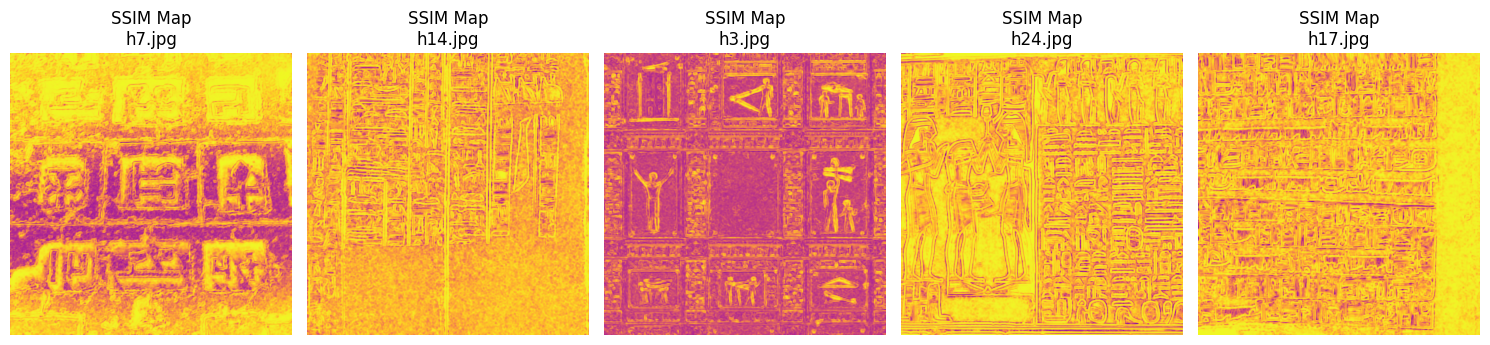

In [3]:
import cv2
import matplotlib.pyplot as plt
import os
import random
from skimage.metrics import structural_similarity as ssim

def load_gray(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

def visualize_ssim_side_by_side(image_paths):
    # Determine the number of images to display
    num_images = len(image_paths)
    
    # Create a subplot grid with 1 row and num_images columns
    plt.figure(figsize=(15, 5))  # Adjust the figure size as needed

    for idx, img_path in enumerate(image_paths):
        img = load_gray(img_path)
        ref = cv2.GaussianBlur(img, (11, 11), 0)
        score, ssim_map = ssim(img, ref, full=True)
        
        # Use a softer color map (e.g., 'plasma' or 'inferno')
        plt.subplot(1, num_images, idx + 1)  # Plot images side by side
        plt.imshow(ssim_map, cmap='plasma')  # 'plasma' for softer colors
        plt.title(f"SSIM Map\n{os.path.basename(img_path)}")
        plt.axis('off')  # Hide axes for better visualization

    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.show()

# Get list of all images in the 'H' folder
folder_path = "H"
image_files = [f for f in os.listdir(folder_path) if f.endswith(".jpg")]

# Randomly select a set of images (e.g., 5 random images)
num_images_to_show = 5
random_images = random.sample(image_files, num_images_to_show)

# Full paths of the selected images
image_paths = [os.path.join(folder_path, img_file) for img_file in random_images]

# Visualize the SSIM maps for the selected random images side by side
visualize_ssim_side_by_side(image_paths)


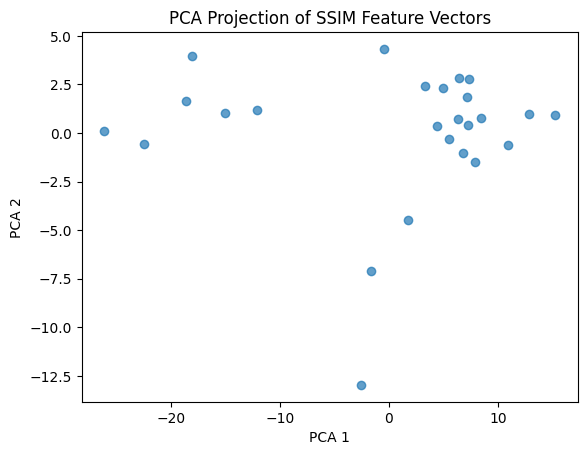

In [4]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

# Function to visualize the feature vectors after dimensionality reduction
def visualize_feature_vectors(features, method="PCA"):
    if method == "PCA":
        # Apply PCA to reduce dimensionality to 2D
        pca = PCA(n_components=2)
        reduced_features = pca.fit_transform(features)
        
        plt.scatter(reduced_features[:, 0], reduced_features[:, 1], alpha=0.7)
        plt.title("PCA Projection of SSIM Feature Vectors")
        plt.xlabel("PCA 1")
        plt.ylabel("PCA 2")
        plt.show()
    
    elif method == "t-SNE":
        # Apply t-SNE for non-linear dimensionality reduction
        tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
        reduced_features = tsne.fit_transform(features)

        plt.scatter(reduced_features[:, 0], reduced_features[:, 1], alpha=0.7)
        plt.title("t-SNE Projection of SSIM Feature Vectors")
        plt.xlabel("t-SNE 1")
        plt.ylabel("t-SNE 2")
        plt.show()

# Example usage: Visualizing feature vectors using PCA
visualize_feature_vectors(features, method="PCA")


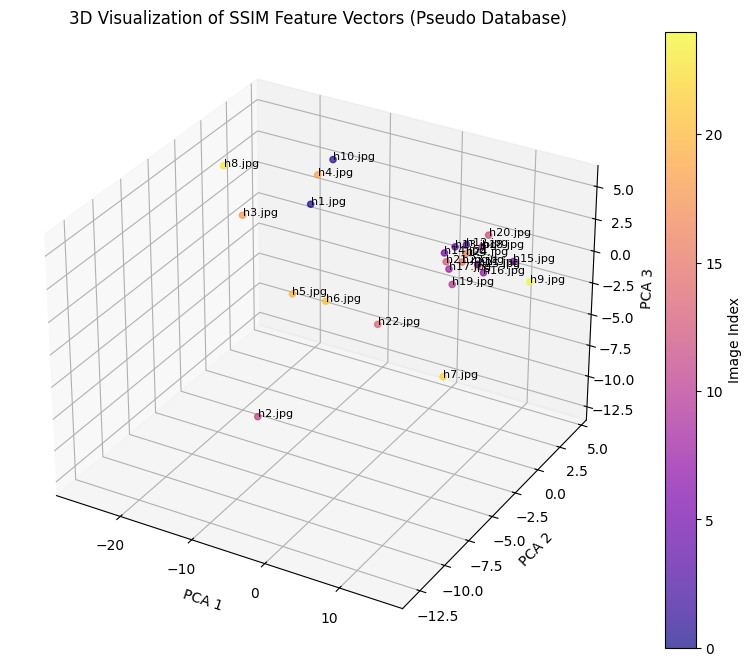

In [5]:
import cv2
import matplotlib.pyplot as plt
import os
import random
import numpy as np
from skimage.metrics import structural_similarity as ssim
from sklearn.decomposition import PCA

# Function to load and convert image to grayscale
def load_gray(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

# Function to compute SSIM feature vector from an image
def ssim_feature(img):
    ref = cv2.GaussianBlur(img, (11, 11), 0)
    score, ssim_map = ssim(img, ref, full=True)
    ssim_map_resized = cv2.resize(ssim_map, (64, 64))  # Resize SSIM map
    return ssim_map_resized.flatten().astype('float32')

# Function to visualize the SSIM feature vectors in a pseudo-database (3D plot)
def visualize_ssim_3d_database(features, image_paths):
    # Apply PCA to reduce dimensionality to 3D
    pca = PCA(n_components=3)
    reduced_features = pca.fit_transform(features)
    
    # Create a 3D scatter plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Scatter plot with features as points in 3D space
    ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], c=np.arange(len(image_paths)), cmap='plasma', alpha=0.7)
    
    # Add labels to the plot
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')
    ax.set_zlabel('PCA 3')
    ax.set_title('3D Visualization of SSIM Feature Vectors (Pseudo Database)')
    
    # Show color bar to represent the index of images
    cbar = plt.colorbar(ax.collections[0], ax=ax, orientation='vertical')
    cbar.set_label('Image Index')
    
    # Annotate the points with image names (optional)
    for i, img_path in enumerate(image_paths):
        ax.text(reduced_features[i, 0], reduced_features[i, 1], reduced_features[i, 2], os.path.basename(img_path), color='black', size=8)
    
    plt.show()

# Get list of all images in the 'H' folder
folder_path = "H"
image_files = [f for f in os.listdir(folder_path) if f.endswith(".jpg")]

# Extract SSIM feature vectors for all images
features = []
for img_file in image_files:
    img_path = os.path.join(folder_path, img_file)
    img = load_gray(img_path)
    feature = ssim_feature(img)
    features.append(feature)

features = np.array(features)

# Visualize the SSIM feature vectors in a 3D scatter plot (pseudo-database)
visualize_ssim_3d_database(features, image_files)


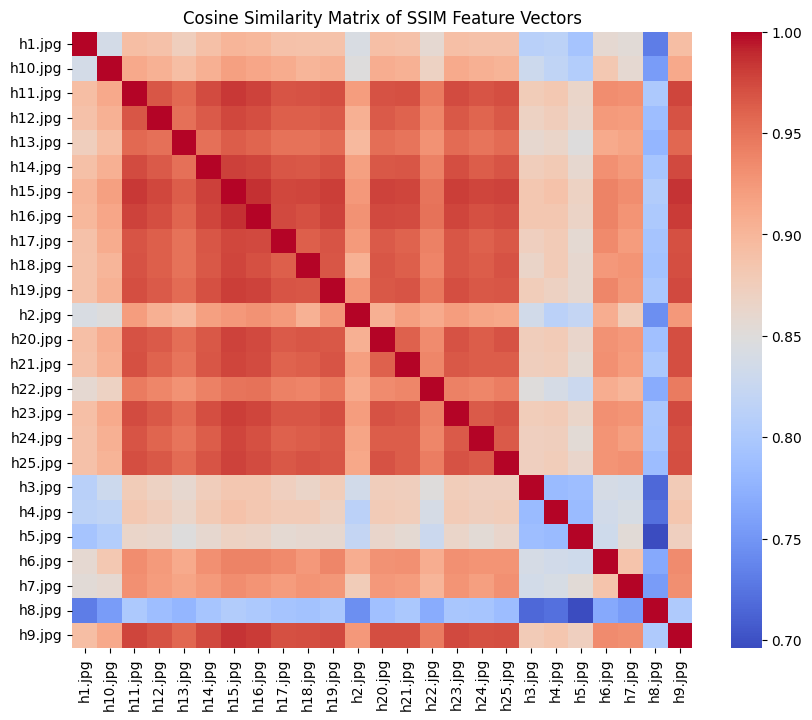

In [7]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

def visualize_distance_matrix(features, image_paths):
    # Calculate cosine similarity matrix (you can also use Euclidean distance)
    cosine_sim = cosine_similarity(features)

    # Plot a heatmap of the cosine similarity
    plt.figure(figsize=(10, 8))
    sns.heatmap(cosine_sim, cmap='coolwarm', xticklabels=image_paths, yticklabels=image_paths, annot=False)
    plt.title('Cosine Similarity Matrix of SSIM Feature Vectors', color='black')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

# Visualize the distance matrix
visualize_distance_matrix(features, image_files)


In [6]:
def load_gray(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

def match_snippet(snippet_path, top_k=3):
    snippet = load_gray(snippet_path)

    # Resize snippet to match original image size during SSIM
    # (smaller snippet < full page works fine)
    feat = ssim_feature(snippet).reshape(1, -1)

    # L2 distance search
    distances, ids = index.search(feat, top_k)

    results = []
    for d, idx in zip(distances[0], ids[0]):
        results.append((filenames[idx], float(d)))

    return results

snippet_path = "ss\\hs-4.jpg"   # after upload
matches = match_snippet(snippet_path, top_k=3)

print("Top 3 matching images:\n")
for name, dist in matches:
    print(f"{name}   (distance={dist:.4f})")


Top 3 matching images:

h4.jpg   (distance=317.9500)
h1.jpg   (distance=319.4507)
h3.jpg   (distance=350.9348)


# Evaluation

In [9]:
import os
import re
import numpy as np
from collections import defaultdict

# Helper: Normalize filenames (remove path)
def norm_name(name):
    return os.path.basename(name).strip()

# Build ground-truth pairs by trying multiple mapping rules
# Rule A: 'hs-' -> 'h' (e.g., ss/hs-25.jpg -> H/h25.jpg)
def map_to_H(basename, h_filenames_set):
    # Rule A: 'hs-' -> 'h'
    cand = re.sub(r"^hs-", "h", basename)  # Corrected mapping
    if cand in h_filenames_set:
        return cand
    return None

# Collect H filenames once
H_files = {norm_name(f) for f in os.listdir("H") if f.lower().endswith(".jpg")}

# Build ground truth from SS folder
ground_truth = {}   # query_basename -> true_H_basename
queries = []
for f in sorted(os.listdir("ss")):
    if not f.lower().endswith(".jpg"):
        continue
    q_base = norm_name(f)
    t_base = map_to_H(q_base, H_files)
    if t_base is not None:
        ground_truth[q_base] = t_base
        queries.append(q_base)

print(f"[Eval] Found {len(queries)} query images in 'ss'.")
print(f"[Eval] Ground-truth pairs that exist in 'H': {len(ground_truth)}")

if not ground_truth:
    print("[Eval] No valid ground-truth pairs. Check filename conventions between 'ss' and 'H'.")
    raise SystemExit  # Stop further evaluation if no valid ground-truth pairs

[Eval] Found 25 query images in 'ss'.
[Eval] Ground-truth pairs that exist in 'H': 25


In [10]:
# Retrieve top-K predictions for a query (uses your existing index/filenames)
def get_top_k_predictions_from_ss(query_basename, k=3):
    q_path = os.path.join("ss", query_basename)
    snippet = load_gray(q_path)
    feat = ssim_feature(snippet).reshape(1, -1)
    distances, ids = index.search(feat, k)
    preds = [filenames[idx] for idx in ids[0]]
    return preds, distances[0].tolist()

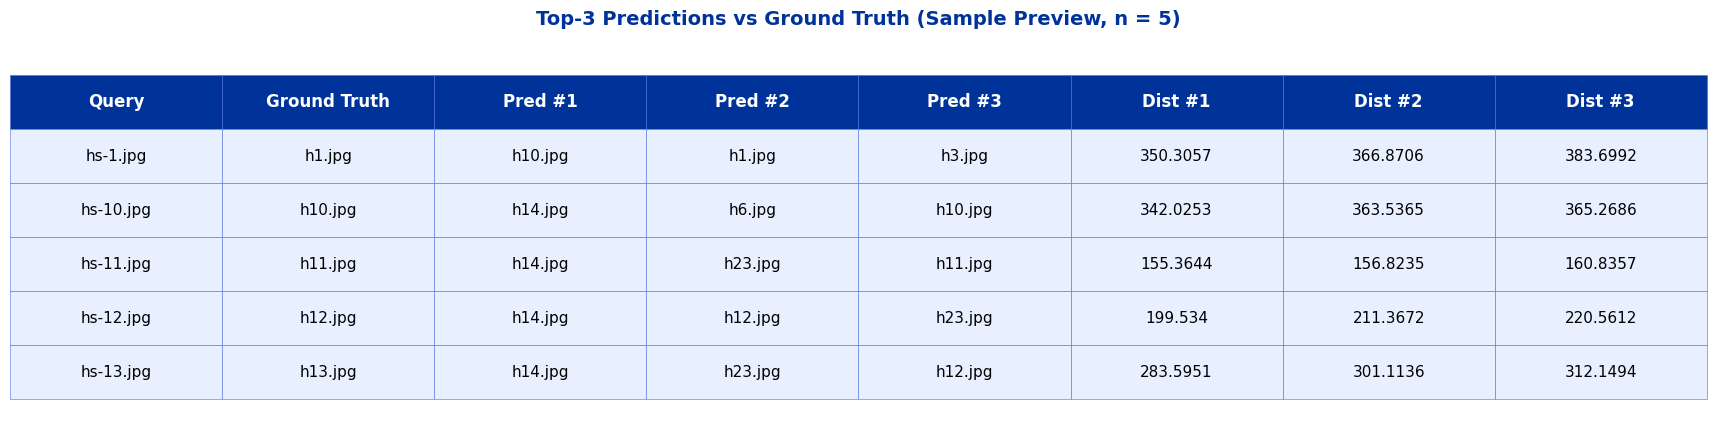

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Collect preview rows ---
rows = []
preview = list(ground_truth.items())[:5]

for qb, tb in preview:
    preds, dists = get_top_k_predictions_from_ss(qb, k=3)
    rows.append({
        "Query": qb,
        "Ground Truth": tb,
        "Pred #1": preds[0] if preds else "",
        "Pred #2": preds[1] if len(preds) > 1 else "",
        "Pred #3": preds[2] if len(preds) > 2 else "",
        "Dist #1": round(dists[0], 4) if dists else "",
        "Dist #2": round(dists[1], 4) if len(dists) > 1 else "",
        "Dist #3": round(dists[2], 4) if len(dists) > 2 else "",
    })

df = pd.DataFrame(rows)

# --- Bigger figure without making cells huge ---
fig, ax = plt.subplots(figsize=(18, 4.5))   # wider, slightly taller

# Title (small, clean)
plt.title(
    "Top-3 Predictions vs Ground Truth (Sample Preview, n = 5)",
    fontsize=14,
    fontweight="bold",
    color="#003399",
    pad=14
)

ax.axis("off")

# Colors
header_color = "#003399"
header_text_color = "white"
row_color = "#e8f0ff"
border_color = "#4a6ee0"

# Table
table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    loc="center",
    cellLoc="center"
)

table.auto_set_font_size(False)
table.set_fontsize(11)

# Keep this small to avoid oversized cells
ROW_HEIGHT = 0.14   # previously 0.18 — reduced to look elegant

for (row, col), cell in table.get_celld().items():

    cell.set_edgecolor(border_color)
    cell.set_linewidth(0.4)

    # Header
    if row == 0:
        cell.set_facecolor(header_color)
        cell.set_text_props(color=header_text_color, weight="bold", fontsize=12)
        cell.set_height(ROW_HEIGHT)
    else:
        cell.set_facecolor(row_color)
        cell.set_height(ROW_HEIGHT)

# Slightly stretch table to use horizontal space
table.scale(1.4, 1.0)

plt.tight_layout()
plt.show()


In [12]:
# Compute metrics
total = len(ground_truth)
correct_topk = 0
relevant_found = 0            # total relevant retrieved across queries (at most 1 per query here)
total_retrieved = total * 3
ap_scores = []

for q_basename, t_basename in ground_truth.items():
    preds, _ = get_top_k_predictions_from_ss(q_basename, k=3)
    # Top-K Accuracy
    if t_basename in preds[:3]:
        correct_topk += 1
        relevant_found += 1  # there is exactly 1 relevant item per query

    # AP for this query (binary relevance, single relevant item)
    # Precision@rank when we first hit the relevant doc, else 0
    ap_this = 0.0
    for rank, p in enumerate(preds, start=1):
        if p == t_basename:
            ap_this = 1.0 / rank
            break
    ap_scores.append(ap_this)

# Safeguards
topk_acc = correct_topk / total if total else 0.0
precision = (relevant_found / total_retrieved) if total_retrieved else 0.0
recall = (relevant_found / total) if total else 0.0
map_score = float(np.mean(ap_scores)) if ap_scores else 0.0

print("\n========== Evaluation ==========")
print(f"Top-K Accuracy (K=3): {topk_acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"mAP:       {map_score:.4f}")


========== Evaluation ==========
Top-K Accuracy (K=3): 0.6400
Precision: 0.2133
Recall:    0.6400
mAP:       0.4333


# Visualize Evaluation Metrics

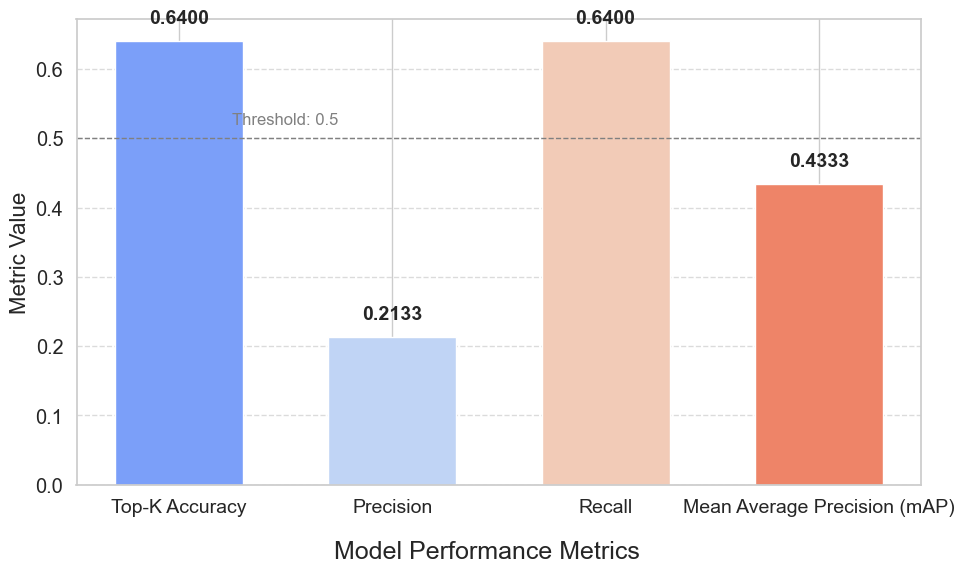

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set Seaborn style for modern and clean visuals
sns.set(style="whitegrid", palette="muted", font_scale=1.3)

# Function to plot metrics with vertical bars and modern styling
def plot_metrics(metrics, labels, title="Model Performance Metrics"):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Bar width
    bar_width = 0.6

    # Positions for the bars
    indices = np.arange(len(metrics))

    # Plot bars with Seaborn's barplot style
    bars = ax.bar(indices, metrics, bar_width, color=sns.color_palette("coolwarm", len(metrics)))

    # Add labels to the bars
    ax.set_xticks(indices)
    ax.set_xticklabels(labels, fontsize=14, ha='center')
    ax.set_ylabel("Metric Value", fontsize=16)

    # Display the value at the top of each bar with larger font size and annotations
    for i, bar in enumerate(bars):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02,
                f'{metrics[i]:.4f}', va='bottom', ha='center', fontsize=14, fontweight='bold')

    # Add gridlines
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)

    # Set the title at the bottom of the plot
    plt.suptitle(title, fontsize=18, y=-0.001)

    # Add a horizontal line for 0.5 mark (for better comparison)
    ax.axhline(0.5, color='gray', linestyle='--', linewidth=1)

    # Add a small annotation to explain the 0.5 threshold
    ax.text(0.5, 0.52, 'Threshold: 0.5', color='gray', fontsize=12, ha='center')

    # Adjust layout to ensure everything fits
    plt.tight_layout()
    plt.show()

# Metrics and labels
metrics = [topk_acc, precision, recall, map_score]
labels = ["Top-K Accuracy", "Precision", "Recall", "Mean Average Precision (mAP)"]

# Plot the metrics with modern Seaborn style
plot_metrics(metrics, labels)


In [14]:
import plotly.graph_objects as go

# Data
metrics = [topk_acc, precision, recall, map_score]
labels = ["Top-K Accuracy", "Precision", "Recall", "Mean Average Precision (mAP)"]

# Create figure
fig = go.Figure()

# Add bars
fig.add_trace(go.Bar(
    x=labels,
    y=metrics,
    marker_color='royalblue',  # You can change the color here
))

# Add title and labels
fig.update_layout(
    title="System Performance Metrics",
    xaxis_title="Metrics",
    yaxis_title="Metric Value",
    title_x=0.5,  # Center title
)

# Show the interactive plot
fig.show()
